In [5]:
 # Pandas
import pandas as pd
from pathlib import Path
Path('my_data.db').touch()
from pprint import pprint

# SQL Alchemy
from sqlalchemy import create_engine

database_path = "Hotel Reservations.csv"

In [6]:
# Import sqlite and connect to engine
import sqlite3
conn = sqlite3.connect('my_data.db')
c = conn.cursor()

In [ ]:
c.execute('''CREATE TABLE reservations (booking_id text, no_of_adults int, no_of_children int,
                                        no_of_weekend_nights int, no_of_week_nights int, type_of_meal_plan text, 
                                        required_car_parking_space int, room_type_reserved text, lead_time text,
                                        arrival_year int, arrival_month int, arrival_date int, market_segment_type text,
                                        repeated_guest int, no_of_previous_cancellations int, no_of_previous_bookings_not_canceled int,
                                        avg_price_per_room int, no_of_special_requests int, booking_status text)''')

In [7]:
# Read in csv file and convert to sqlite database
reservations = pd.read_csv('Hotel Reservations.csv')
reservations.to_sql('reservations', conn, if_exists='append', index=False)

36275

In [8]:

data = pd.read_sql("SELECT * FROM reservations", conn)

In [9]:
data.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [10]:
data_clean = pd.read_sql("SELECT no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_month, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status FROM reservations", conn)
data_clean.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


In [11]:
#Export to CSV
data_clean.to_csv('hotel_reservations.csv')

In [12]:
#Check for missing values
data_clean.apply(pd.isnull).sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
#Check target variable counts
data_clean['booking_status'].value_counts()

Not_Canceled    97560
Canceled        47540
Name: booking_status, dtype: int64

In [14]:
#Check data types
data_clean.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                object
arrival_month                             int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [15]:
#Convert lead_time to integer
data_clean['lead_time'] = data_clean['lead_time'].astype('int64')

In [16]:
#Check that it was successfully changed
data_clean.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_month                             int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [17]:
# Define the features as X and target as y
X= data_clean.drop(columns='booking_status')
y = data_clean['booking_status']

In [18]:
#Encode categorical variables using get dummies
X = pd.get_dummies(X)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Import scikit learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
#Check shape of X_train
X_train.shape

(108825, 28)

In [22]:
#Check shape of X_test
X_test.shape

(36275, 28)

In [23]:
#Use standard scaler to scale train and test data (leverging 20.2 homework as guide)
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

## Nearest Neighbor

In [ ]:
#Instantiate K Nearest Neighbor model
n_neighbors = [5,4,3,2,1]
def neighbors(N):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train_scaled,y_train)
    predictions = knn.predict(X_test_scaled)
    accuracy = balanced_accuracy_score(y_test,predictions)
    print(f"N_Neighbors = {N}")
    print(f"Balanced Accuracy Score: {accuracy}")
    print(classification_report(y_test,predictions))
    print("_________________________________________\n")
    matrix = confusion_matrix(y_test,predictions)
    matrix_df = pd.DataFrame(matrix,index = ['Actual Canceled','Actual Not Canceled'],columns=['Predicted Canceled','Predicted Not Canceled'])
    return matrix_df,accuracy
optimization = {}
for i in n_neighbors:
    matrix_df,accuracy = neighbors(i)
    optimization[str(i)]=accuracy

    


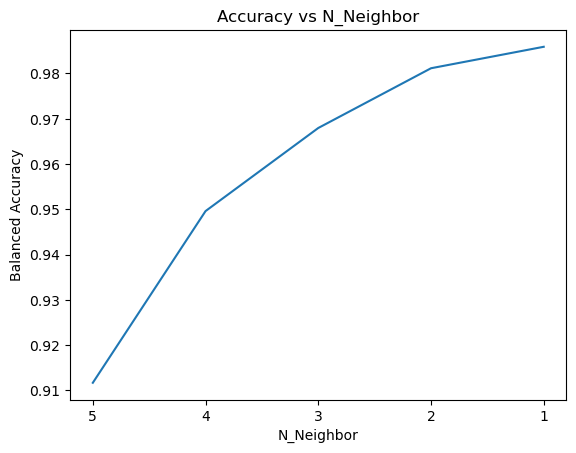

In [68]:
#Plot accuracy scores for each value of n_neighbor
import matplotlib.pyplot as plt
x_values = list(optimization.keys())
y_values = list(optimization.values())
xticks = x_values
plt.plot(x_values,y_values)
plt.ylabel('Balanced Accuracy')
plt.xlabel('N_Neighbor')
plt.title('Accuracy vs N_Neighbor')
plt.xticks(xticks)
plt.savefig('Optimization_Charts/Nearest_Neighbor.png')
plt.show()



In [68]:
#Attempt with n_neighbors = 5
neighbors(5)

Balanced Accuracy Score: 0.86829986419316
              precision    recall  f1-score   support

    Canceled       0.84      0.81      0.83      8934
Not_Canceled       0.91      0.92      0.92     18273

    accuracy                           0.89     27207
   macro avg       0.87      0.87      0.87     27207
weighted avg       0.89      0.89      0.89     27207



,Predicted Canceled,Predicted Not Canceled
Actual Canceled,7255,1679
Actual Not Canceled,1379,16894


In [59]:
#Attempt with n_neighbors = 4
neighbors(4)

N_Neighbors = 4
Balanced Accuracy Score: 0.9496050210571492
              precision    recall  f1-score   support

    Canceled       0.88      0.96      0.92     11923
Not_Canceled       0.98      0.94      0.96     24352

    accuracy                           0.95     36275
   macro avg       0.93      0.95      0.94     36275
weighted avg       0.95      0.95      0.95     36275

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                   11465                     458
 Actual Not Canceled                1519                   22833,
 0.9496050210571492)

In [69]:
#Attempt with n_neighbors = 3
neighbors(3)

Balanced Accuracy Score: 0.9270587419804923
              precision    recall  f1-score   support

    Canceled       0.90      0.90      0.90      8934
Not_Canceled       0.95      0.95      0.95     18273

    accuracy                           0.94     27207
   macro avg       0.93      0.93      0.93     27207
weighted avg       0.94      0.94      0.94     27207



,Predicted Canceled,Predicted Not Canceled
Actual Canceled,8058,876
Actual Not Canceled,874,17399


In [70]:
#Attempt with n_neighbors = 2
neighbors(2)

Balanced Accuracy Score: 0.9599166760295506
              precision    recall  f1-score   support

    Canceled       0.89      0.98      0.93      8934
Not_Canceled       0.99      0.94      0.96     18273

    accuracy                           0.95     27207
   macro avg       0.94      0.96      0.95     27207
weighted avg       0.96      0.95      0.95     27207



,Predicted Canceled,Predicted Not Canceled
Actual Canceled,8738,196
Actual Not Canceled,1064,17209


In [58]:
#Attempt with n_neighbors = 1
neighbors(1)

N_Neighbors = 1
Balanced Accuracy Score: 0.9858975475491389
              precision    recall  f1-score   support

    Canceled       0.98      0.98      0.98     11923
Not_Canceled       0.99      0.99      0.99     24352

    accuracy                           0.99     36275
   macro avg       0.99      0.99      0.99     36275
weighted avg       0.99      0.99      0.99     36275

_________________________________________



(                     Predicted Canceled  Predicted Not Canceled
 Actual Canceled                   11691                     232
 Actual Not Canceled                 213                   24139,
 0.9858975475491389)

## Random Forest

In [62]:
#Create function for random forest, passing in estimator number
estimators = [100,200,300,400,500]
def forest(estimator):
    rf_model = RandomForestClassifier(n_estimators = estimator,random_state=0)
    rf_model = rf_model.fit(X_train_scaled, y_train)
    predictions = rf_model.predict(X_test_scaled)
    accuracy = balanced_accuracy_score(y_test,predictions)
    print(f"Balanced Accuracy Score: {accuracy}")
    print("_________________________________________\n")
    print("Classification Report:")
    print(classification_report(y_test,predictions))
    importances = rf_model.feature_importances_
    importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
    matrix = confusion_matrix(y_test,predictions)
    matrix_df = pd.DataFrame(matrix,index = ['Actual Canceled','Actual Not Canceled'],columns=['Predicted Canceled','Predicted Not Canceled'])
    print("_________________________________________\n")
    print("Feature Importances")
    pprint(importances_sorted[:10])
    print("_________________________________________\n")
    print("Confusion Matrix")
    return matrix_df,accuracy

optimization_forest = {}
for i in estimators:
    matrix_df,accuracy = forest(i)
    optimization_forest[str(i)]=accuracy
    

Balanced Accuracy Score: 0.9879253871865936
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.99      0.98      0.98     11923
Not_Canceled       0.99      0.99      0.99     24352

    accuracy                           0.99     36275
   macro avg       0.99      0.99      0.99     36275
weighted avg       0.99      0.99      0.99     36275

_________________________________________

Feature Importances
[(0.37801005688519757, 'lead_time'),
 (0.19009935114140808, 'avg_price_per_room'),
 (0.10560191061404611, 'no_of_special_requests'),
 (0.09423080660128473, 'arrival_month'),
 (0.06069410788169398, 'no_of_week_nights'),
 (0.04222121340689817, 'no_of_weekend_nights'),
 (0.027246309239003307, 'market_segment_type_Online'),
 (0.024510858732989735, 'no_of_adults'),
 (0.016386245938371586, 'market_segment_type_Offline'),
 (0.007455758896341303, 'type_of_meal_plan_Meal Plan 2')]
_______________________

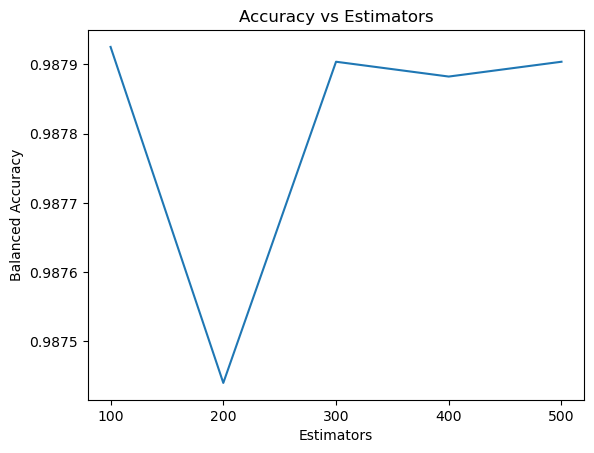

In [67]:
#Plot accuracy scores for each estimator value
import matplotlib.pyplot as plt
x_values = list(optimization_forest.keys())
y_values = list(optimization_forest.values())
xticks = x_values
plt.plot(x_values,y_values)
plt.ylabel('Balanced Accuracy')
plt.xlabel('Estimators')
plt.title('Accuracy vs Estimators')
plt.xticks(xticks)
plt.savefig('Optimization_Charts/Random_forest.png')
plt.show()


In [110]:
#Attempt 1 with 100 estimators
forest(100)

Balanced Accuracy Score: 0.9830968153073651
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.98      0.97      0.98      8934
Not_Canceled       0.99      0.99      0.99     18273

    accuracy                           0.99     27207
   macro avg       0.99      0.98      0.98     27207
weighted avg       0.99      0.99      0.99     27207

_________________________________________

Feature Importances
[(0.3747782375287848, 'lead_time'),
 (0.1914570359238978, 'avg_price_per_room'),
 (0.10527266106005233, 'no_of_special_requests'),
 (0.09607273555652038, 'arrival_month'),
 (0.05856028708398406, 'no_of_week_nights'),
 (0.041715074407669, 'no_of_weekend_nights'),
 (0.027256037015820567, 'market_segment_type_Online'),
 (0.02441460273739931, 'no_of_adults'),
 (0.01781247006728094, 'market_segment_type_Offline'),
 (0.007998910148688641, 'type_of_meal_plan_Meal Plan 2')]
_____________________________

,Predicted Canceled,Predicted Not Canceled
Actual Canceled,8697,237
Actual Not Canceled,133,18140


In [ ]:
#Attempt 2 with 200 estimators
forest(200)

In [111]:
#Attempt 3 with 300 estimators
forest(300)

Balanced Accuracy Score: 0.9831042578353373
_________________________________________

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.98      0.97      0.98      8934
Not_Canceled       0.99      0.99      0.99     18273

    accuracy                           0.99     27207
   macro avg       0.99      0.98      0.98     27207
weighted avg       0.99      0.99      0.99     27207

_________________________________________

Feature Importances
[(0.3753381811802104, 'lead_time'),
 (0.19041571879045946, 'avg_price_per_room'),
 (0.10971297715344874, 'no_of_special_requests'),
 (0.09476439145874213, 'arrival_month'),
 (0.05894195104465597, 'no_of_week_nights'),
 (0.04177160538828613, 'no_of_weekend_nights'),
 (0.02624384146855149, 'market_segment_type_Online'),
 (0.024975434849698504, 'no_of_adults'),
 (0.016606338514656732, 'market_segment_type_Offline'),
 (0.007632126740015149, 'type_of_meal_plan_Meal Plan 2')]
_________________________

,Predicted Canceled,Predicted Not Canceled
Actual Canceled,8703,231
Actual Not Canceled,145,18128


In [ ]:
#Attempt 4 with 400 estimators
forest(400)

In [ ]:
#Attempt 5 with 500 estimators
forest(500)

## Analysis
Written analysis here